# importer les bibliotheques

In [2]:
import requests
from bs4 import BeautifulSoup
import re
import csv
from urllib.parse import urljoin, urlparse
import mysql.connector
import logging
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

# extraire les liens vers toutes les pages du site

In [16]:
def get_all_page2():
    urls=[]
    page_number = 1
    
    for i in range(50):
        i = f"https://books.toscrape.com/catalogue/page-{page_number}.html"
        page_number += 1
        urls.append(i)
    return urls

# Fonction pour extraire les détails d'un livre

In [17]:
# Fonction pour extraire les détails d'un livre
def extract_book_details2(book):
    
    # book c'est la section d'une page qui contient un livre. c'est dans cette section on va extraire le lien pour 
    # entrer dans la page d'un livre
    
    #book_url c'est le lien pour entrer sur la page d'un livre 
    book_url = book.find('div', class_='image_container').a["href"]
    
    # URL de base pour arriver sur un livre en particulier
    base_url = 'https://books.toscrape.com/catalogue/'
    
    #former le lien complet du livre sur la page en concatenant book_url et base_url
    lien_complet = urljoin(base_url,  book_url)
    url_book = lien_complet
    #print(url_book)
    
    # extraire les informations du livre dans sa page
    response = requests.get(lien_complet) #ouvrir la page 
    soup = BeautifulSoup(response.text, 'html.parser')  # transformer en beautifulsoup

    title = soup.find('h1').text.strip() # le titre du livre
    p = soup.find('p', class_='price_color').text.strip() # le prix tout taxe
    priceTTC = re.search(r'\d+\.\d+', p).group() # retrait du symbole de l'euro
    
    #extraire la disponibilite du produit
    chaine = soup.find('p', class_='instock availability').text.strip()
    availability = re.search(r'^\w+\s\w+', chaine).group()
    
    #extraire la quantite du produit
    stock = re.search(r'\d+', chaine).group()
    
    #extraire le raiting
    rating_class = soup.find('p', class_='star-rating')['class'][1]
    rating = rating_class.strip() 
    
    #extraire le lien vers l'image du livre
    base_url2 = 'https://books.toscrape.com/media/'  # url de base pour les images
    im = soup.find('div', class_='item active').img["src"]
    chemin_relatif2 = '/'.join(im.split('/')[3:]) # Extraire le chemin relatif de l'image
    image_url = urljoin(base_url2, chemin_relatif2)
    
    #extraire la categorie du produit
    li_tags = soup.find('ul', class_='breadcrumb')
    li = li_tags.find_all('li')
    # L'avant-dernier li
    category = li[-2].get_text(strip=True)
    #print(category)
    
    
    #extraire la taxe
    t = soup.find('table', class_='table table-striped')
    tr=t.find_all('tr')
    taxe = tr[4].td.get_text(strip=True)
    #print(taxe)
    
    # extraire number of reviews
    n= soup.find('table', class_='table table-striped')
    tr=n.find_all('tr')
    reviews = tr[6].td.get_text(strip=True)
    #print(reviews)
    
    # Créer une liste pour stocker les données de chaque élément
    data = []
    data.append([title, priceTTC, availability,stock, image_url,url_book, rating, category])
    with open('produits_extrait.csv', mode='a', newline='',encoding='utf-8') as file:
        writer = csv.writer(file)
        #writer.writerow(['title', 'price', 'availability', 'image_url','book_url', 'Rating','category'])
        writer.writerows(data)

    return data



# scraper tous les livres du site

In [18]:
def parse_all_page2():
    page = get_all_page2()# recuperer la liste des liens vers toutes les pages
    n=[]
    for p in page: # p c'est le lien d'une page
        r = requests.get(p) # ouvrir une page
        soup = BeautifulSoup(r.text, 'html.parser')
        books = soup.find_all('article', class_='product_pod') # recupere les sections de tous les livres de la page
        
        print(f"on scrape{p}\n")
        for b in books: # pour un livre particulier b
            n.append(extract_book_details2(book=b)) # extraire les details de ce livre et ajouter a la liste n
        
    print(len(n))
    return n
datasetfin = []
datasetfin=parse_all_page2()
print(datasetfin)


on scrapehttps://books.toscrape.com/catalogue/page-1.html

on scrapehttps://books.toscrape.com/catalogue/page-2.html

on scrapehttps://books.toscrape.com/catalogue/page-3.html

on scrapehttps://books.toscrape.com/catalogue/page-4.html

on scrapehttps://books.toscrape.com/catalogue/page-5.html

on scrapehttps://books.toscrape.com/catalogue/page-6.html

on scrapehttps://books.toscrape.com/catalogue/page-7.html

on scrapehttps://books.toscrape.com/catalogue/page-8.html

on scrapehttps://books.toscrape.com/catalogue/page-9.html

on scrapehttps://books.toscrape.com/catalogue/page-10.html

on scrapehttps://books.toscrape.com/catalogue/page-11.html

on scrapehttps://books.toscrape.com/catalogue/page-12.html

on scrapehttps://books.toscrape.com/catalogue/page-13.html

on scrapehttps://books.toscrape.com/catalogue/page-14.html

on scrapehttps://books.toscrape.com/catalogue/page-15.html

on scrapehttps://books.toscrape.com/catalogue/page-16.html

on scrapehttps://books.toscrape.com/catalogue/pag

# fonction qui permet d'extraire les categories

In [11]:
def get_categorie():
    # URL de base
    base_url = 'https://books.toscrape.com/'

    # Récupérer la page d'accueil
    response = requests.get(base_url + 'index.html')
    soup = BeautifulSoup(response.text, 'html.parser')

    # Récupérer la liste des catégories et supprimer la première catégorie
    categories = soup.find('ul', class_='nav-list').find_all('li')
    categories.pop(0)  # Supprimer la première catégorie
    nomsCategories = []
    for cat in categories:
        nomsCategories.append(cat.a.text.strip())
    return nomsCategories
c = get_categorie()
print(c)

['Travel', 'Mystery', 'Historical Fiction', 'Sequential Art', 'Classics', 'Philosophy', 'Romance', 'Womens Fiction', 'Fiction', 'Childrens', 'Religion', 'Nonfiction', 'Music', 'Default', 'Science Fiction', 'Sports and Games', 'Add a comment', 'Fantasy', 'New Adult', 'Young Adult', 'Science', 'Poetry', 'Paranormal', 'Art', 'Psychology', 'Autobiography', 'Parenting', 'Adult Fiction', 'Humor', 'Horror', 'History', 'Food and Drink', 'Christian Fiction', 'Business', 'Biography', 'Thriller', 'Contemporary', 'Spirituality', 'Academic', 'Self Help', 'Historical', 'Christian', 'Suspense', 'Short Stories', 'Novels', 'Health', 'Politics', 'Cultural', 'Erotica', 'Crime']


# Configuration de la journalisation

In [3]:
logging.basicConfig(filename='queries.sql', level=logging.INFO, format='%(asctime)s - %(message)s')

# Connexion à notre base de données MySQL 

In [4]:
mydb = mysql.connector.connect(
  host="localhost",
  user="leonce",
  password="aaaa",
  database="brief2"
)

# Créez un curseur pour exécuter des requêtes SQL :

In [6]:
mycursor = mydb.cursor()

In [8]:
# supprimer la table livre1 si elle existe deja
#sql = "drop table livres"
#mycursor.execute(sql)
# supprimer la table categories si elle existe deja
sql = "drop table categories"
mycursor.execute(sql) 

# creer la table categorie

In [9]:
table_schema = (
    "CREATE TABLE categories ("
    "  Nom VARCHAR(255) PRIMARY KEY"
    ")"
)

mycursor.execute(table_schema) # executer la requete
logging.info(table_schema) # enregistrer la requete dans le fichier de journalisation

# inserer les categories extraites sur le site dans la table categorie

In [12]:
maliste = [(item,) for item in c] # c contient la liste des categorie issue de la fonction get_categorie()
sql = "INSERT INTO categories (Nom) VALUES (%s)"
mycursor.executemany(sql, maliste) # executer la requete
mydb.commit() #confirmer la modification de la base de donnees
logging.info(sql) # enregistrer la requete dans le fichier de journalisation

# afficher le contenu de la table categorie

In [13]:
# Exécution d'une requête pour sélectionner toutes les lignes de la table
mycursor.execute("SELECT * FROM categories")

# Récupération des résultats de la requête
result = mycursor.fetchall()

# Affichage des résultats
for row in result:
      print(row)
logging.info(result)

('Academic',)
('Add a comment',)
('Adult Fiction',)
('Art',)
('Autobiography',)
('Biography',)
('Business',)
('Childrens',)
('Christian',)
('Christian Fiction',)
('Classics',)
('Contemporary',)
('Crime',)
('Cultural',)
('Default',)
('Erotica',)
('Fantasy',)
('Fiction',)
('Food and Drink',)
('Health',)
('Historical',)
('Historical Fiction',)
('History',)
('Horror',)
('Humor',)
('Music',)
('Mystery',)
('New Adult',)
('Nonfiction',)
('Novels',)
('Paranormal',)
('Parenting',)
('Philosophy',)
('Poetry',)
('Politics',)
('Psychology',)
('Religion',)
('Romance',)
('Science',)
('Science Fiction',)
('Self Help',)
('Sequential Art',)
('Short Stories',)
('Spirituality',)
('Sports and Games',)
('Suspense',)
('Thriller',)
('Travel',)
('Womens Fiction',)
('Young Adult',)


# creer la table livres

In [14]:
table_schema = (
    "CREATE TABLE livres ("
    "  id INT AUTO_INCREMENT PRIMARY KEY,"
    "  title VARCHAR(255),"
        "priceTTC VARCHAR(255),"
    "  availability VARCHAR(255),"
     "stock VARCHAR(255),"
    "  image_url VARCHAR(255),"
    "  url_book VARCHAR(255),"
    "rating VARCHAR(255),"
    "category VARCHAR(255),"
    "  FOREIGN KEY (category) REFERENCES categories(Nom)"
    ")"
)
mycursor.execute(table_schema)  # executer la requete
logging.info(table_schema)# enregistrer la requete dans le fichier de journalisation

# inserer les elements dans la table livres

In [19]:
maliste = [item[0] for item in datasetfin]
sql = "INSERT INTO livres (title, priceTTC, availability,stock, image_url,url_book, rating, category) VALUES (%s,%s,%s,%s, %s, %s, %s, %s)"
mycursor.executemany(sql, maliste)
mydb.commit() #Validez les changements dans la base de données 
logging.info(sql)

# afficher la table livre

In [20]:
# Exécution d'une requête pour sélectionner toutes les lignes de la table
mycursor.execute("SELECT * FROM livres")

# Récupération des résultats de la requête
result = mycursor.fetchall()

# Affichage des résultats
for row in result:
      print(row)
logging.info(result)

(1, 'A Light in the Attic', '51.77', 'In stock', '22', 'https://books.toscrape.com/media/cache/fe/72/fe72f0532301ec28892ae79a629a293c.jpg', 'https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html', 'Three', 'Poetry')
(2, 'Tipping the Velvet', '53.74', 'In stock', '20', 'https://books.toscrape.com/media/cache/08/e9/08e94f3731d7d6b760dfbfbc02ca5c62.jpg', 'https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html', 'One', 'Historical Fiction')
(3, 'Soumission', '50.10', 'In stock', '20', 'https://books.toscrape.com/media/cache/ee/cf/eecfe998905e455df12064dba399c075.jpg', 'https://books.toscrape.com/catalogue/soumission_998/index.html', 'One', 'Fiction')
(4, 'Sharp Objects', '47.82', 'In stock', '20', 'https://books.toscrape.com/media/cache/c0/59/c05972805aa7201171b8fc71a5b00292.jpg', 'https://books.toscrape.com/catalogue/sharp-objects_997/index.html', 'Four', 'Mystery')
(5, 'Sapiens: A Brief History of Humankind', '54.23', 'In stock', '20', 'https://books.t

# Fermez le curseur et la connexion à la base de données

In [21]:
mycursor.close()
mydb.close()

# visualisation des donnees

In [26]:
data_client = pd.read_csv('produits_extrait1.csv',names=['title', 'price', 'availability','stock', 'image_url','book_url' ,'rating', 'category'],header=None,index_col=False)

data_client['rating'] = data_client['rating'].replace({'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5})
data_client.head(50)
#print(data_client['category'])

,title,price,availability,stock,image_url,book_url,rating,category
0,A Light in the Attic,51.77,In stock,22,https://books.toscrape.com/media/cache/fe/72/f...,https://books.toscrape.com/catalogue/a-light-i...,3,Poetry
1,Tipping the Velvet,53.74,In stock,20,https://books.toscrape.com/media/cache/08/e9/0...,https://books.toscrape.com/catalogue/tipping-t...,1,Historical Fiction
2,Soumission,50.10,In stock,20,https://books.toscrape.com/media/cache/ee/cf/e...,https://books.toscrape.com/catalogue/soumissio...,1,Fiction
3,Sharp Objects,47.82,In stock,20,https://books.toscrape.com/media/cache/c0/59/c...,https://books.toscrape.com/catalogue/sharp-obj...,4,Mystery
4,Sapiens: A Brief History of Humankind,54.23,In stock,20,https://books.toscrape.com/media/cache/ce/5f/c...,https://books.toscrape.com/catalogue/sapiens-a...,5,History
5,The Requiem Red,22.65,In stock,19,https://books.toscrape.com/media/cache/6b/07/6...,https://books.toscrape.com/catalogue/the-requi...,1,Young Adult
6,The Dirty Little Secrets of Getting Your Dream...,33.34,In stock,19,https://books.toscrape.com/media/cache/e1/1b/e...,https://books.toscrape.com/catalogue/the-dirty...,4,Business
7,The Coming Woman: A Novel Based on the Life of...,17.93,In stock,19,https://books.toscrape.com/media/cache/97/36/9...,https://books.toscrape.com/catalogue/the-comin...,3,Default
8,The Boys in the Boat: Nine Americans and Their...,22.60,In stock,19,https://books.toscrape.com/media/cache/d1/2d/d...,https://books.toscrape.com/catalogue/the-boys-...,4,Default
9,The Black Maria,52.15,In stock,19,https://books.toscrape.com/media/cache/d1/7a/d...,https://books.toscrape.com/catalogue/the-black...,1,Poetry


# verifier les donnees manquantes

In [27]:
# verifier les donnees manquantes avec `isna()`
missing_data = data_client.isna().sum()

# afficher les donnees manquantes
print("Données manquantes par colonne :")
print(missing_data)

# chercher les lignes avec les donnees manquantes `any()`
rows_with_missing_data = data_client.isnull().any(axis=1)

# afficher le nombre de ligne avec les donnees manquantes
print("\nNombre de lignes avec des données manquantes :", rows_with_missing_data.sum())


Données manquantes par colonne :
title           0
price           0
availability    0
stock           0
image_url       0
book_url        0
rating          0
category        0
dtype: int64

Nombre de lignes avec des données manquantes : 0


# les 10 produits les moins couteux

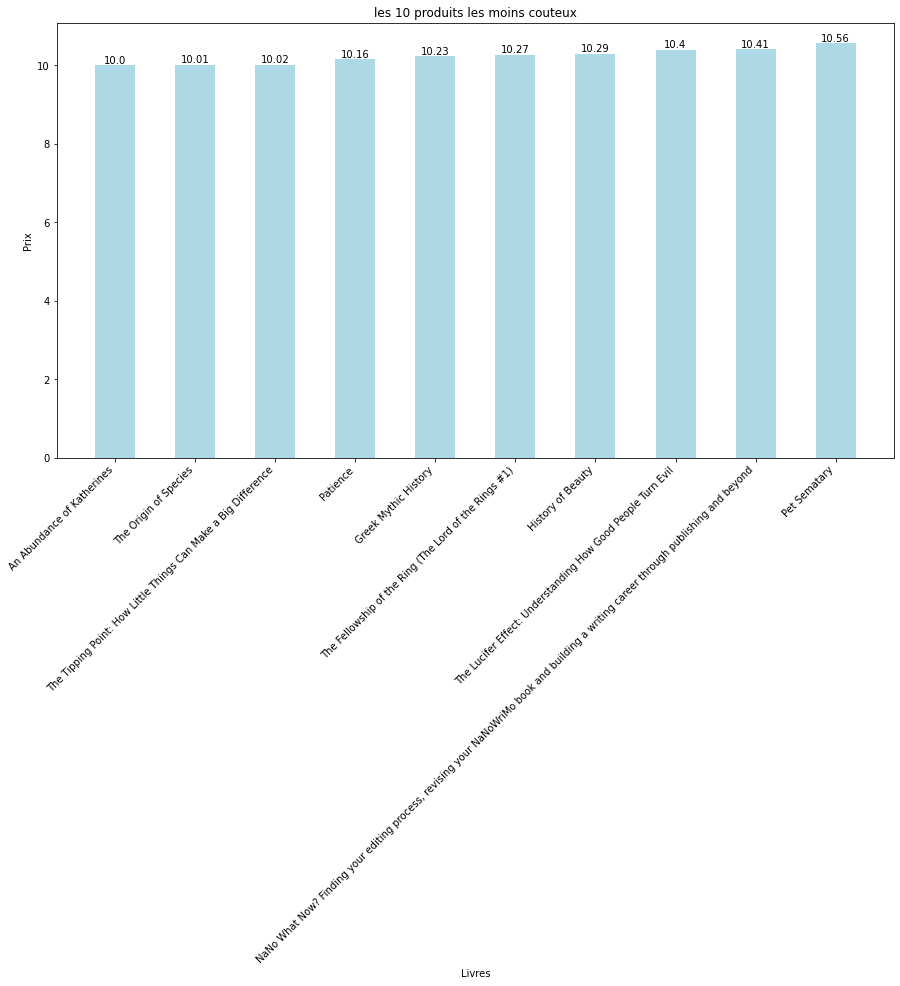

In [28]:

#les 5 premiers
p = data_client.sort_values(by='price').head(10)
p

# Créer un graphique à barres
plt.figure(figsize=(15, 8))
bars = plt.bar(p['title'], p['price'], width=0.5,color='lightblue')

# Annoter chaque barre avec le montant de la vente
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.xticks(range(len(p)), rotation=45, ha='right') 
plt.xlabel('Livres')
plt.ylabel('Prix')
plt.title('les 10 produits les moins couteux')
plt.savefig('les_10_produits_les_moins_couteux.png')
plt.show()

# les 10 produits les plus couteux

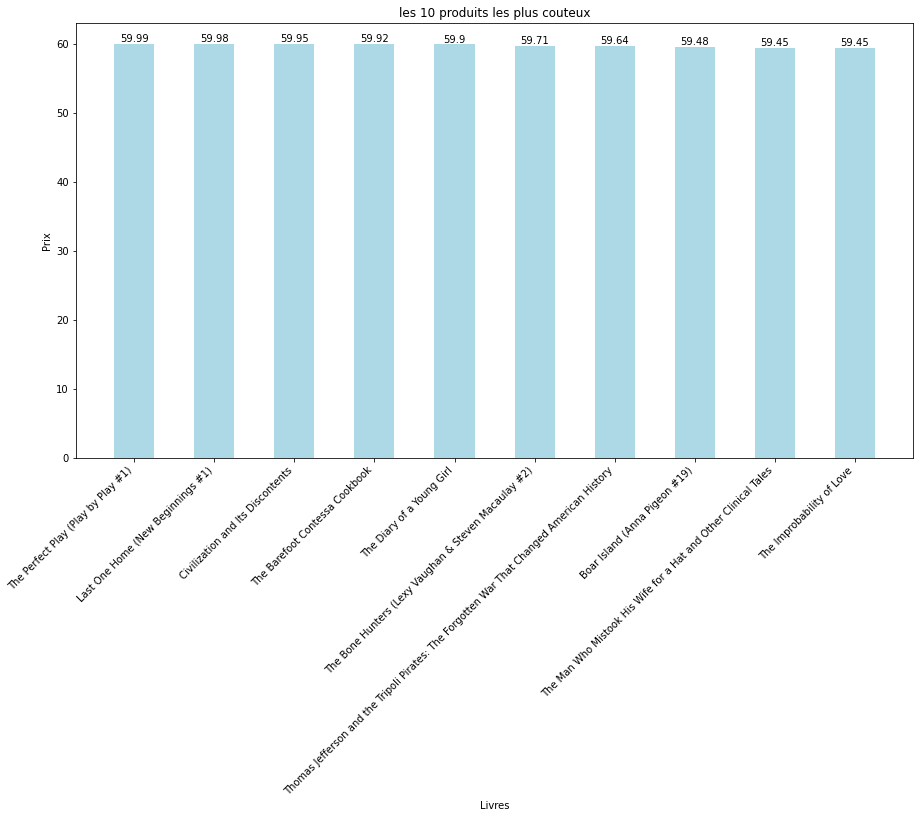

In [29]:

#trier le dataframe par ordre decroissant
p = data_client.sort_values(by='price', ascending=False).head(10)
p
# Créer un graphique à barres
plt.figure(figsize=(15, 8))
bars = plt.bar(p['title'], p['price'], width=0.5,color='lightblue')

# Annoter chaque barre avec le montant de la vente
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.xticks(range(len(p)), rotation=45, ha='right') 
plt.xlabel('Livres')
plt.ylabel('Prix')
plt.title('les 10 produits les plus couteux')
plt.savefig('les_10_produits_les_plus_couteux.png')
plt.show()

# les 10 produits les plus recommandés

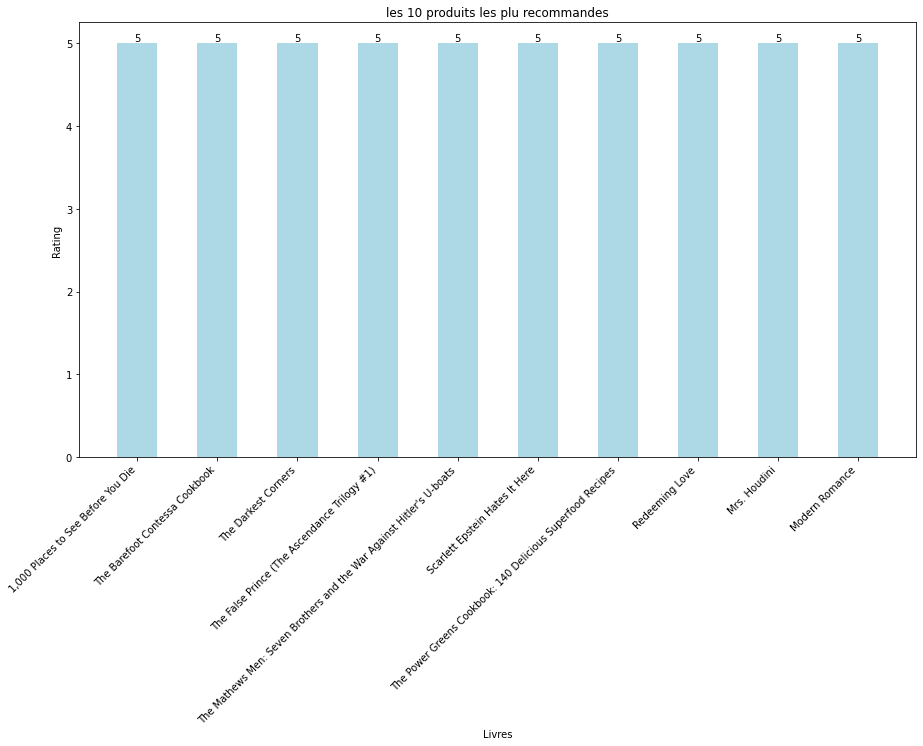

In [31]:

#trier le dataframe par ordre decroissant
p = data_client.sort_values(by='rating', ascending=False).head(10)
p
# Créer un graphique à barres
plt.figure(figsize=(15, 8))
bars = plt.bar(p['title'], p['rating'], width=0.5,color='lightblue')

# Annoter chaque barre avec le montant de la vente
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.xticks(range(len(p)), rotation=45, ha='right') 
plt.xlabel('Livres')
plt.ylabel('Rating')
plt.title('les 10 produits les plu recommandes')
plt.savefig('les_10_produits_les_plus_recommendes.png')
plt.show()

# les 10 produits les moins recommandés

/tmp/ipykernel_39094/198051497.py:17: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.savefig('les_10_produits_les_moins_recommendes.png')
/tmp/ipykernel_39094/198051497.py:17: UserWarning: Glyph 153 (\x99) missing from current font.
  plt.savefig('les_10_produits_les_moins_recommendes.png')
/home/user/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


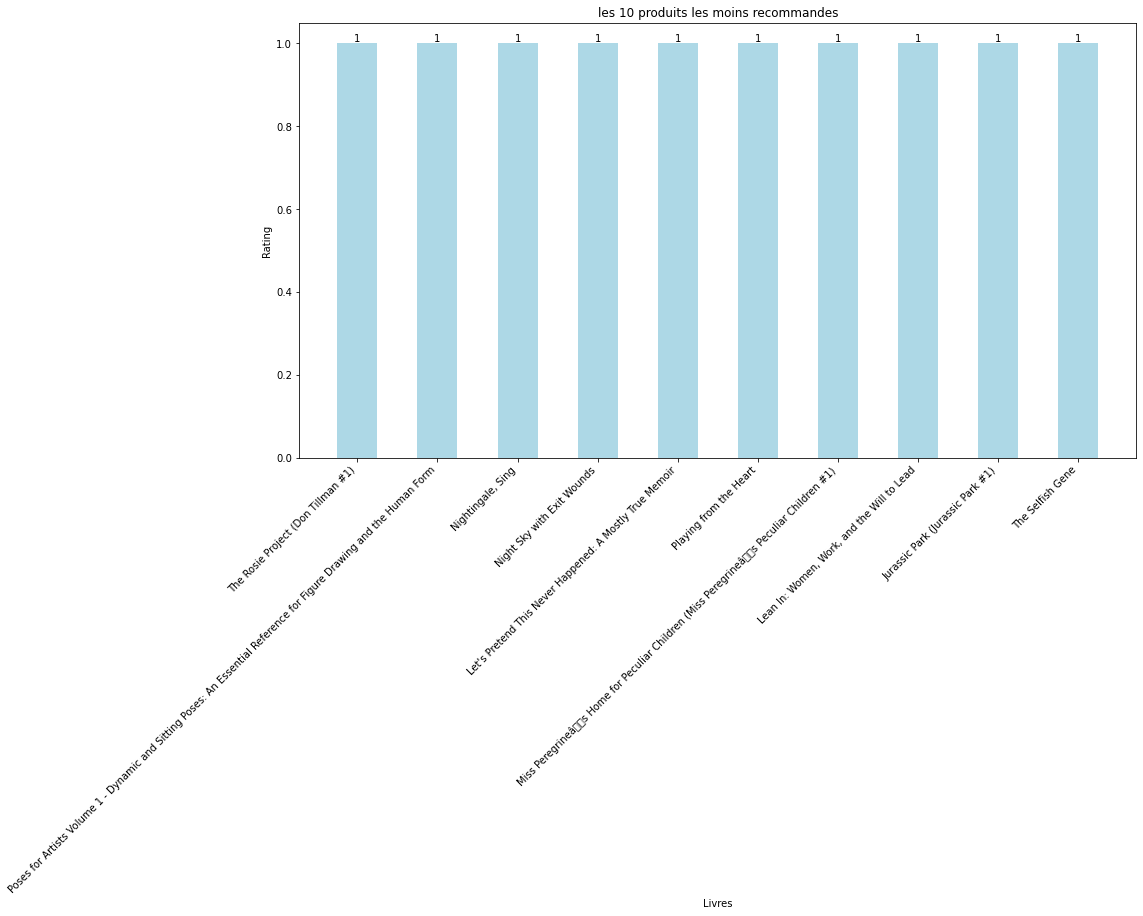

In [30]:
#les 5 premiers
p = data_client.sort_values(by='rating').head(10)
p
# Créer un graphique à barres
plt.figure(figsize=(15, 8))
bars = plt.bar(p['title'], p['rating'], width=0.5,color='lightblue')

# Annoter chaque barre avec le montant de la vente
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.xticks(range(len(p)), rotation=45, ha='right') 
plt.xlabel('Livres')
plt.ylabel('Rating')
plt.title('les 10 produits les moins recommandes')
plt.savefig('les_10_produits_les_moins_recommendes.png')
plt.show()

# les 5 catégories ayant le plus de produits en stocks

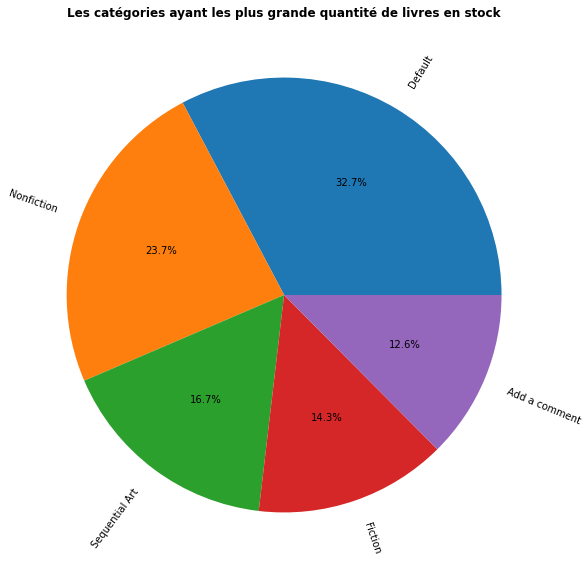

In [32]:
p = data_client.groupby("category")["stock"].sum().sort_values(ascending = False).head(5)
p

plt.figure(figsize = (10,10))
plt.pie(p,labels =p.index, rotatelabels =True,autopct="%1.1f%%" );
plt.title("Les catégories ayant les plus grande quantité de livres en stock",  size =12, weight = 'bold')
plt.savefig('les_5_catégories_ayant_le_plus_de_produits_en_stocks.png')

# Les 3 catégories ayant les produits les plus coûteux

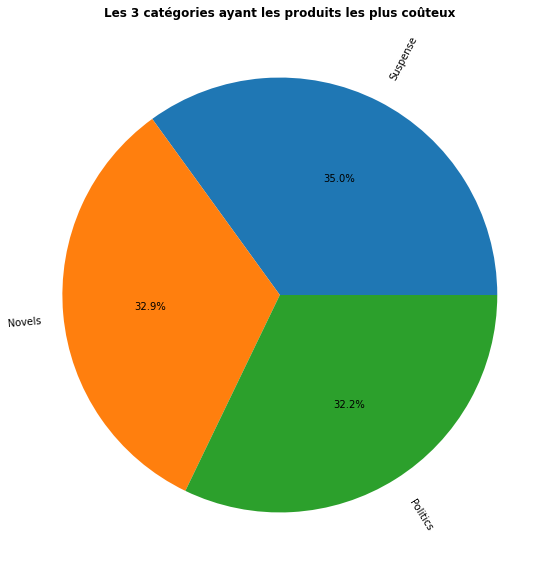

In [33]:
p=data_client.groupby("category")["price"].mean().sort_values(ascending = False).head(3)
p

plt.figure(figsize = (10,10))
plt.pie(p,labels =p.index, rotatelabels =True,autopct="%1.1f%%" );
plt.title("Les 3 catégories ayant les produits les plus coûteux",  size =12, weight = 'bold')
plt.savefig('Les_3_catégories_ayant_les_produits_les_plus_coûteux.png')